In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [3]:
uni=pd.read_csv('Universities.csv')
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
uni.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [5]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


##### From the above o/p, we can see that there are no null values.

In [6]:
#We don't nee the 1st column "Univ" for the analysis, so we can drop that
uni.data=uni.iloc[:,1:]
uni.data.head()

<ipython-input-6-fa2ea638443b>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  uni.data=uni.iloc[:,1:]


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [7]:
#Converting into numpy array, because we are using the sklearn library
UNI=uni.data.values
UNI

array([[ 1310,    89,    22,    13, 22704,    94],
       [ 1415,   100,    25,     6, 63575,    81],
       [ 1260,    62,    59,     9, 25026,    72],
       [ 1310,    76,    24,    12, 31510,    88],
       [ 1280,    83,    33,    13, 21864,    90],
       [ 1340,    89,    23,    10, 32162,    95],
       [ 1315,    90,    30,    12, 31585,    95],
       [ 1255,    74,    24,    12, 20126,    92],
       [ 1400,    91,    14,    11, 39525,    97],
       [ 1305,    75,    44,     7, 58691,    87],
       [ 1380,    94,    30,    10, 34870,    91],
       [ 1260,    85,    39,    11, 28052,    89],
       [ 1255,    81,    42,    13, 15122,    94],
       [ 1081,    38,    54,    18, 10185,    80],
       [ 1375,    91,    14,     8, 30220,    95],
       [ 1005,    28,    90,    19,  9066,    69],
       [ 1360,    90,    20,    12, 36450,    93],
       [ 1075,    49,    67,    25,  8704,    67],
       [ 1240,    95,    40,    17, 15140,    78],
       [ 1290,    75,    50,   

In [8]:
#On the above array,we are applying the "scale" function
uni_normal=scale(UNI)
uni_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [9]:
pca=PCA()
pca_values=pca.fit_transform(uni_normal)

In [10]:
pca_values

array([[-1.00987445e+00, -1.06430962e+00,  8.10663051e-02,
         5.69506350e-02, -1.28754245e-01, -3.46496377e-02],
       [-2.82223781e+00,  2.25904458e+00,  8.36828830e-01,
         1.43844644e-01, -1.25961913e-01, -1.80703168e-01],
       [ 1.11246577e+00,  1.63120889e+00, -2.66786839e-01,
         1.07507502e+00, -1.91814148e-01,  3.45679459e-01],
       [-7.41741217e-01, -4.21874699e-02,  6.05008649e-02,
        -1.57208116e-01, -5.77611392e-01,  1.09163092e-01],
       [-3.11912064e-01, -6.35243572e-01,  1.02405189e-02,
         1.71363672e-01,  1.27261287e-02, -1.69212696e-02],
       [-1.69669089e+00, -3.44363283e-01, -2.53407507e-01,
         1.25643278e-02, -5.26606002e-02, -2.71661600e-02],
       [-1.24682093e+00, -4.90983662e-01, -3.20938196e-02,
        -2.05643780e-01,  2.93505340e-01, -7.80119838e-02],
       [-3.38749784e-01, -7.85168589e-01, -4.93584829e-01,
         3.98563085e-02, -5.44978619e-01, -1.55371653e-01],
       [-2.37415013e+00, -3.86538883e-01,  1.160

##### It is known that, the no of principal components created will be equal to the no of columns in the dataset. So, here there are 6 columns, hence 6 principal components have been created.

In [11]:
#if we want to explicitly mention the no.of principal components
#pca=PCA(n_components=6)
#pca_values=pca.fit_transform(uni_normal)

#### Under the PCA model, variance is one of the by product. So we are extracting that variance, using the keyword "explained_variance_ratio_"

In [12]:
variance=pca.explained_variance_ratio_
variance

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [13]:
#Cumulative variance
var1=np.cumsum(np.round(variance,decimals=4)*100)
var1

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

##### From the above o/p, we can decide that how many principal components we want to choose. If we choose PC1, then we will be dealing with 76.87% of the data. If we want to choose PC1 & PC2, then we will be dealing with 89.98% of the data and so on..

In [14]:
#Displaying the components of PC1,PC2..PC6
pca.components_

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

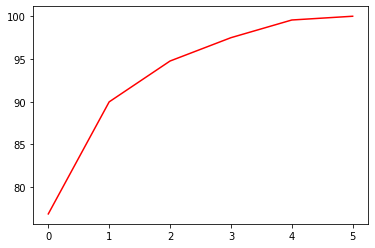

In [15]:
#Line plot for cumulative variance(for larger dataset, we can't display it individually using cumsum,in those cases visulaizing it like this helps)
plt.plot(var1,color="red")

##### From this, we have decided to choose 1st principal components.

In [16]:
pca_values[:,0:2]

array([[-1.00987445, -1.06430962],
       [-2.82223781,  2.25904458],
       [ 1.11246577,  1.63120889],
       [-0.74174122, -0.04218747],
       [-0.31191206, -0.63524357],
       [-1.69669089, -0.34436328],
       [-1.24682093, -0.49098366],
       [-0.33874978, -0.78516859],
       [-2.37415013, -0.38653888],
       [-1.40327739,  2.11951503],
       [-1.72610332,  0.08823712],
       [-0.45085748, -0.01113295],
       [ 0.04023814, -1.00920438],
       [ 3.23373034, -0.37458049],
       [-2.23626502, -0.37179329],
       [ 5.17299212,  0.77991535],
       [-1.69964377, -0.30559745],
       [ 4.578146  , -0.34759136],
       [ 0.82260312, -0.69890615],
       [-0.09776213,  0.65044645],
       [ 1.9631826 , -0.22476756],
       [-0.54228894, -0.07958884],
       [ 0.53222092, -1.0171672 ],
       [ 3.54869664,  0.77846167],
       [-2.30590032, -0.11770432]])

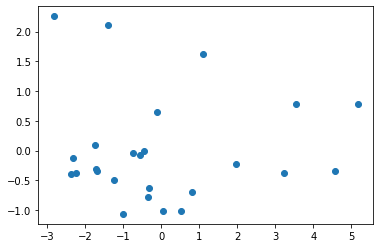

In [17]:
#plot b/w PCA1 and PCA2
x=pca_values[:,0:1]
y=pca_values[:,1:2]
plt.scatter(x,y)

##### In the above plot, we couldn't see which dot is representing which university. So the above plot can be modified a little bit for easy understanding.

In [18]:
finalDF=pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']),uni[['Univ']]],axis=1)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

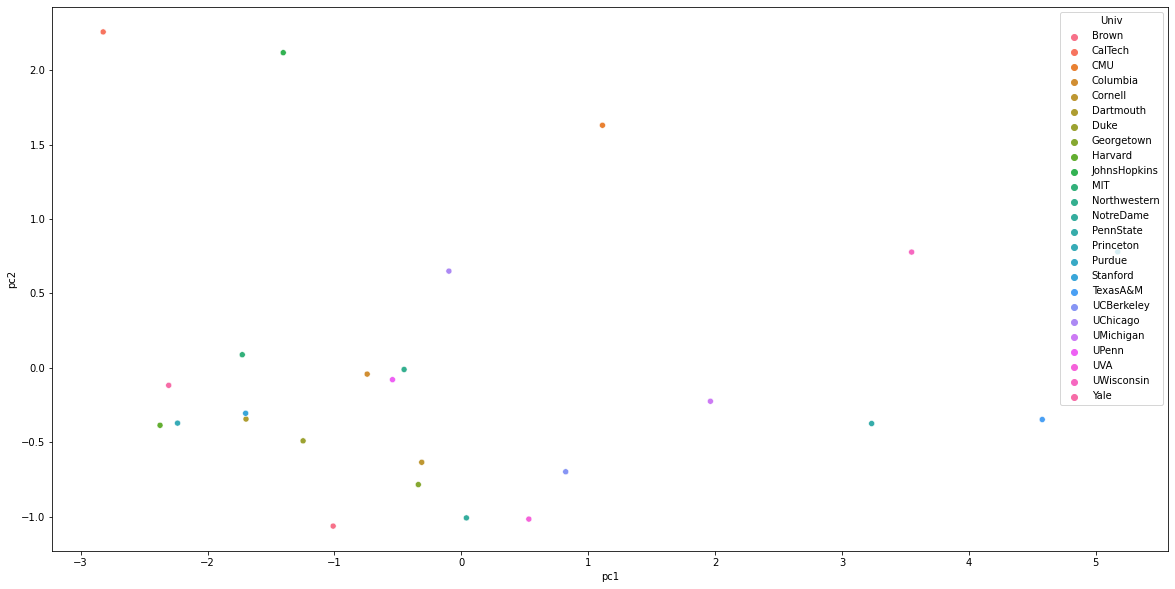

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
sns.scatterplot(data=finalDF,x='pc1',y='pc2',hue='Univ')